**Expression:** 

$Pr(x^*|x_1..x_n) = \int Pr(x^*|\theta)Pr(\theta|x_1..x_n)d\theta$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
# Prepare data
original_mu = 5
original_sig = 8
I = 10 # data points --> Change this value to recognize
r = original_mu + original_sig * np.random.randn(I,1)

In [3]:
# Maximum of a likelihood
def mleNorm(x):
    I = x.size;
    mu = sum(x) / I;
    var = sum(pow(x - mu, 2)) / I;
    return mu, var

# Maximum of a posterior
def mapNorm(x, alpha, beta, gamma, delta):
    I = x.size;
    mu = (sum(x) + gamma*delta) / (I + gamma);
    var_up = sum(pow(x - mu,2)) + 2*beta + gamma*pow(delta-mu,2);
    var_down = I + 3 + 2*alpha;
    var = var_up / var_down;
    return mu, var

In [4]:
estimated_mu, estimated_var = mleNorm(r)
estimated_sig = np.sqrt(estimated_var)

# MAP Error value
map_mu, map_sig = mapNorm(r,1,1,1,0)
map_sig = np.sqrt(map_sig)
print('Error value MAP: ', map_mu, map_sig)

# MLE Error value
muError = abs(original_mu - estimated_mu)
sigError = abs(original_sig - estimated_sig)
print('Error value: ', muError,sigError)


Error value MAP:  [4.69128864] [6.00834013]
Error value:  [0.16041751] [0.82160701]


In [5]:
# Normalize distribution
x = np.linspace(-20,30,100)
original = stats.norm.pdf(x, original_mu, original_sig)
map_estimated = stats.norm.pdf(x, map_mu, map_sig)
mle_estimated = stats.norm.pdf(x, estimated_mu, estimated_sig)

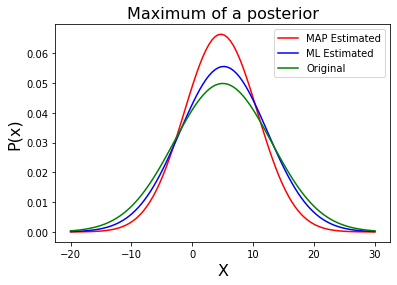

In [6]:
plt.plot(x, map_estimated, color = 'r', label = 'MAP Estimated')
plt.plot(x, mle_estimated, color ='b', label = 'ML Estimated')
plt.plot(x, original, color ='g', label = 'Original')
plt.xlabel('X', size = 16)
plt.ylabel('P(x)', size = 16)
plt.title('Maximum of a posterior', size = 16)
plt.legend()
plt.show()